<a href="https://colab.research.google.com/github/ThePingPing/Numerical_Analysis/blob/main/QuadratureFirstMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
from scipy.integrate import quad
from scipy.special import roots_legendre
from sympy.abc import x, omega

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
<ipython-input-14-4ae257c8fb53>:88: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  true_value, _ = quad(lambda x: f(x) * np.exp(1j * omega * g(x)), a, b)
<ipython-input-14-4ae257c8fb53>:88: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  true_value, _ = quad(lambda x: f(x) * np.exp(1j * omega * g(x)), a, b)


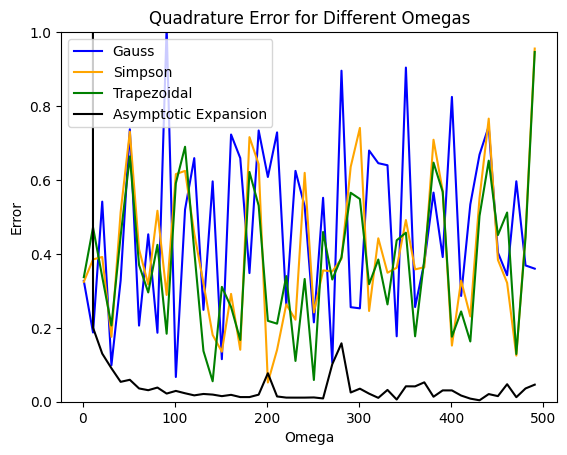

In [14]:
# Fonctions f(x) et g(x)
def f(x):
    return np.cos(np.pi * x)

def g(x):
    return x**2 + 3*x



# Méthode de Gauss

def gauss_quadrature(f, a, b, omega, n):
    nodes, weights = roots_legendre(n)
    integral = 0
    for i in range(n):
        integral += weights[i] * f(0.5 * (b - a) * nodes[i] + 0.5 * (b + a)) * np.exp(1j * omega * g(0.5 * (b - a) * nodes[i] + 0.5 * (b + a)))
    return 0.5 * (b - a) * integral

# Méthode de Simpson

def simpson_quadrature(f, a, b, omega, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    integral = f(a) * np.exp(1j * omega * g(a)) + f(b) * np.exp(1j * omega * g(b))
    for i in range(1, n):
        integral += 4 * f(x[i]) * np.exp(1j * omega * g(x[i])) if i % 2 == 1 else 2 * f(x[i]) * np.exp(1j * omega * g(x[i]))
    return h / 3 * integral

# Méthode des trapèzes

def trapezoidal_quadrature(f, a, b, omega, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) * np.exp(1j * omega * g(a)) + f(b) * np.exp(1j * omega * g(b)))
    for i in range(1, n):
        integral += f(a + i * h) * np.exp(1j * omega * g(a + i * h))
    return h * integral


# Méthode des

def asymptotic_expansion_quadrature(fx, gx_tag, df, oscillator, a, b, omega,  s):

  sign = 0
  integral  = 0
  for i in range(s+1):
    sign = 1 / ((-1j * omega) ** (i+1))
    df_b = df.subs({x:b})
    df_a = df.subs({x:a})
    oscillator_b = oscillator.subs({x:b, teta:omega})
    oscillator_a = oscillator.subs({x:a, teta:omega})

    func  = sign * ((df_b * oscillator_b ) - (df_a * oscillator_a) )
    integral += func
    df = sym.diff(df, x)

  integral = (-1) * integral.evalf()
  return integral

## Initilisation des parametre pour les methode classique

omegas = np.arange(1, 500, 10)
n = 10
a = -1
b = 1

## Initilisation des parametre pour les methode classique
x, teta = sym.symbols("x,teta")
fx = sym.cos(sym.pi * x)
gx = x**2 + 3*x
oscillator = (sym.exp(1j * teta * (gx)))

gx_tag = sym.diff(gx, x)
#final_func = (fx / gx_tag) * oscillator
df = sym.diff((fx / gx_tag), x)

s = 5


# Calcul et affichage des graphiques d'erreur
errors_gauss = []
errors_simpson = []
errors_trapezoidal = []
errors_asynptotic_expansion = []

for omega in omegas:
    true_value, _ = quad(lambda x: f(x) * np.exp(1j * omega * g(x)), a, b)

    gauss_value = gauss_quadrature(f, a, b, omega, n)
    simpson_value = simpson_quadrature(f, a, b, omega, n)
    trapezoidal_value = trapezoidal_quadrature(f, a, b, omega, n)

    value_asym = asymptotic_expansion_quadrature(fx, gx_tag, df, oscillator, a, b, omega,  s)

    errors_gauss.append(np.abs(true_value - gauss_value))
    errors_simpson.append(np.abs(true_value - simpson_value))

    errors_trapezoidal.append(np.abs(true_value - trapezoidal_value))
    errors_asynptotic_expansion.append(np.abs(true_value - value_asym))

plt.plot(omegas, errors_gauss, label='Gauss', color='blue')
plt.plot(omegas, errors_simpson, label='Simpson', color='orange')
plt.plot(omegas, errors_trapezoidal, label='Trapezoidal', color='green')
plt.plot(omegas, errors_asynptotic_expansion, label='Asymptotic Expansion', color='black')

plt.xlabel('Omega')
plt.ylabel('Error')
plt.ylim ([0, 1])
plt.title('Quadrature Error for Different Omegas')
plt.legend()
plt.show()
